Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
num_pts =  10000   dim =  2


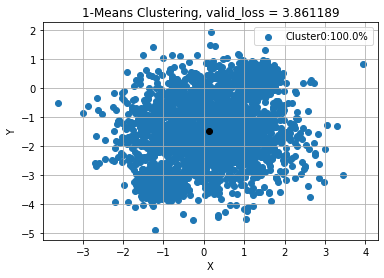

num_pts =  10000   dim =  2


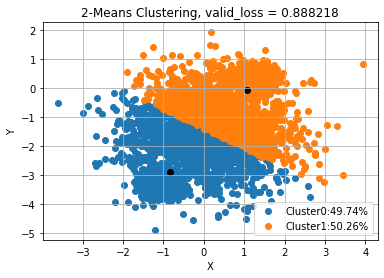

num_pts =  10000   dim =  2


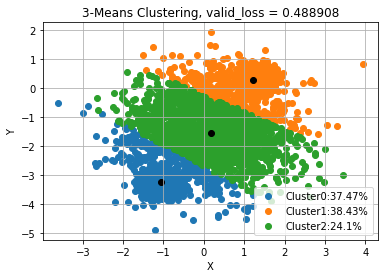

num_pts =  10000   dim =  2


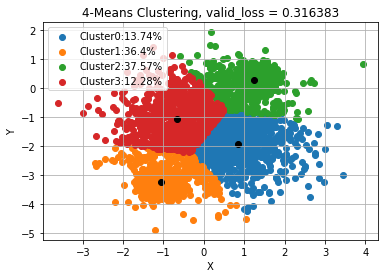

num_pts =  10000   dim =  2


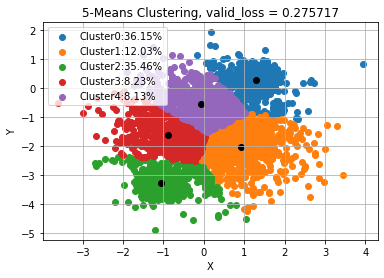

In [6]:
%tensorflow_version 1.x
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/ECE421_Lab3/')
import helper as hlp


# Loading data
def load_dataset(is_2D,is_valid = False):
  data = None
  if(is_2D):
    data = np.load('/content/drive/MyDrive/Colab Notebooks/ECE421_Lab3/data2D.npy')
  else:
    data = np.load('data100D.npy')
  [num_pts, dim] = np.shape(data)
  print("num_pts = ",num_pts,"  dim = ",dim)

  # For Validation set
  if is_valid:
    valid_batch = int(num_pts / 3.0)
    np.random.seed(45689)
    rnd_idx = np.arange(num_pts)
    np.random.shuffle(rnd_idx)
    val_data = data[rnd_idx[:valid_batch]]
    data = data[rnd_idx[valid_batch:]]
    return data, val_data
  else:
    return data


# Distance function for K-means
def distance_func(X, mu):
  """ Inputs:
        X: is an NxD matrix (N observations and D dimensions)
        mu: is an KxD matrix (K means and D dimensions)
        
      Output:
        pair_dist: is the squared pairwise distance matrix (NxK)
  """
  X = tf.expand_dims(X,1) #shape becomes (N,1,D)
  square = tf.square((X-mu))
  pair_dist = tf.reduce_sum(square,2) #change shape to (N,K)
  return pair_dist

def buildGraph(K,D):
  X = tf.placeholder(tf.float64, shape=(None,D))
  mu = tf.Variable(tf.truncated_normal((K, D), mean=0, stddev=1, dtype=tf.float64), trainable=True)
  loss = tf.reduce_sum(tf.reduce_min(distance_func(X,mu), axis=1))
  optimizer = tf.train.AdamOptimizer(learning_rate=0.1, beta1=0.9, beta2=0.99, epsilon=1e-5).minimize(loss)
  return X,mu,loss,optimizer


def Train_K_means(dataset,K,epochs,valid_data):
  D = dataset.shape[1]
  X,mu,loss,optimizer = buildGraph(K,D)
  loss_List = []
  best_mu = None
  cluster = None
  valid_loss = None
  with tf.Session() as sess:
      sess.run(tf.global_variables_initializer())
      for i in range(epochs):
          best_mu,opt = sess.run([mu,optimizer], feed_dict={X: dataset})
          Loss = sess.run(loss, feed_dict={X: dataset})
          loss_List.append(Loss/dataset.shape[0])

      # end of traning find cluster
      # Returns the index with the smallest value across axes of a tensor
      cluster = sess.run(tf.argmin(distance_func(X, best_mu), 1),feed_dict={X:dataset})
      # end of training find validation loss
      valid_loss = sess.run(loss, feed_dict={X: valid_data})
      valid_loss = valid_loss/valid_data.shape[0]
  return loss_List,best_mu,cluster,valid_loss

def plot_loss(train, valid = None):
  iterations = range(len(train))
  print("train_loss is ", train[-1])
  plt.plot(iterations,train,label = "training")
  if(valid):
    print("valid_loss is ", valid[-1])
    plt.plot(iterations,valid,label = "validation")
  plt.xlabel("Epoch")
  plt.ylabel("Loss")
  plt.legend()
  plt.title('Loss vs epoch')
  plt.show()
  return 

def Q1():
  data = load_dataset(True)
  loss_List,best_mu,cluster,valid_loss = Train_K_means(data,3,200,data)
  plot_loss(loss_List)
  return

#Q1()

def plot_cluster(K,dataset,cluster,mu,valid_loss):
  legend = []
  for i in range(K):
    class_i=[]
    for j in range(len(cluster)):
      if (cluster[j]==i):
        class_i.append(dataset[j,:])
    class_i = np.array(class_i)
    plt.scatter(class_i[:, 0], class_i[:, 1], cmap='Pastel')
    #calculate number of data belongs to cluster
    percentage = str(round(100*np.sum(i==cluster)/len(cluster), 2)) 
    legend.append("Cluster"+str(i)+":"+percentage+"%")
  plt.legend(legend)
  plt.scatter(mu[:, 0], mu[:, 1], c='black')
  plt.title("%d-Means Clustering, valid_loss = %f" %(K,valid_loss))
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.grid()
  plt.show()
  return 

def Q2():
  K_list = [1,2,3,4,5]
  for K in K_list:
    data, val_data = load_dataset(True,True)
    loss_List,best_mu,cluster,valid_loss = Train_K_means(data,K,100,val_data)
    plot_cluster(K,data,cluster,best_mu,valid_loss)
  return    

Q2()



# 新段落

# 新段落

# 新段落